Loading dataset...
Dataset saved to outputs/titanic_dataset.csv
Saved: outputs/count_by_class.png


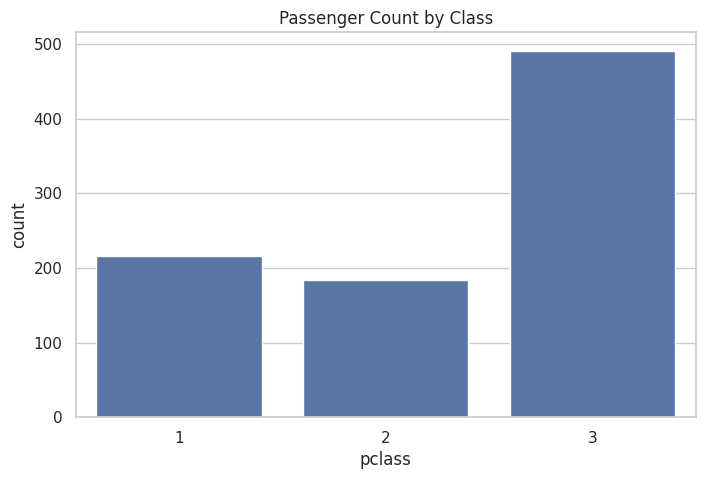

Saved: outputs/survival_rate_by_class.png


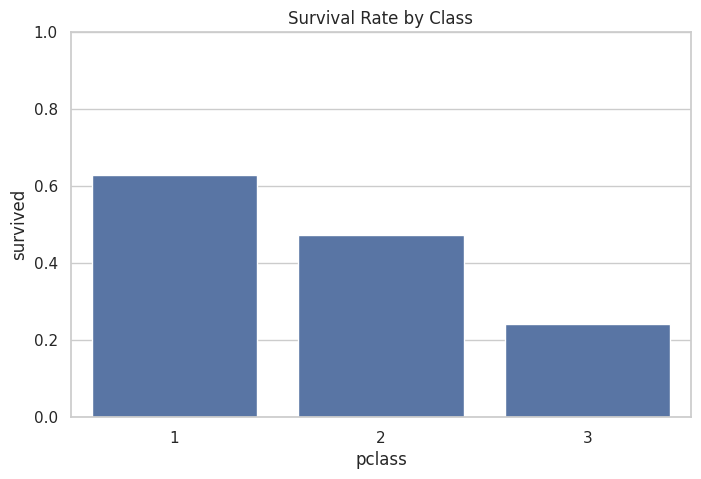

Saved: outputs/survival_by_sex.png


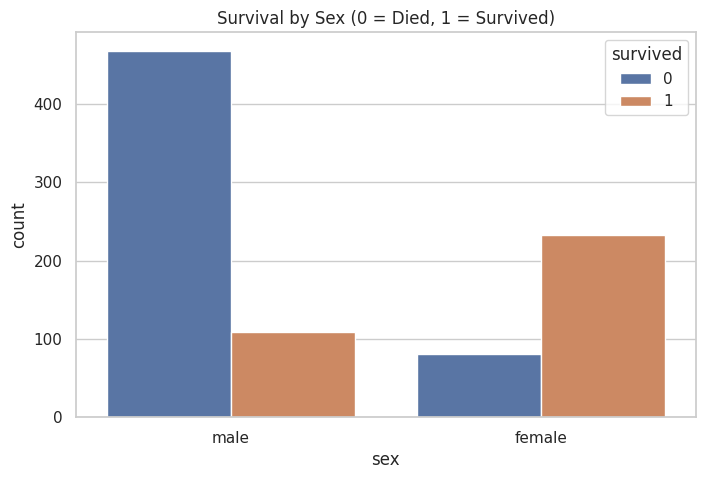

Saved: outputs/age_kde_by_survival.png


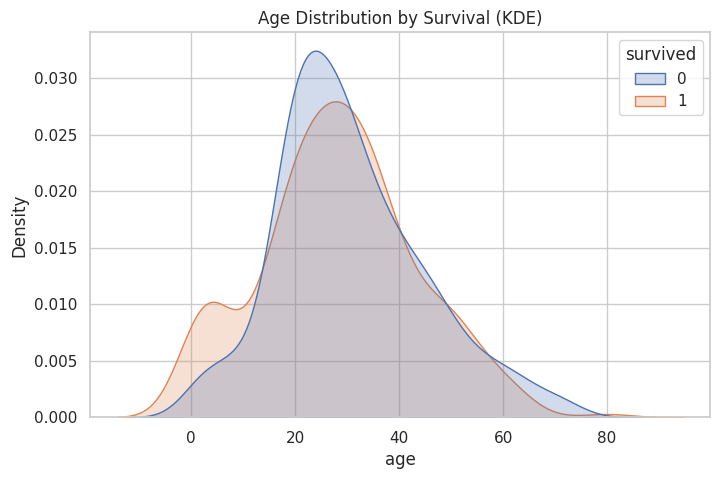

Saved: outputs/age_violin_by_survival.png


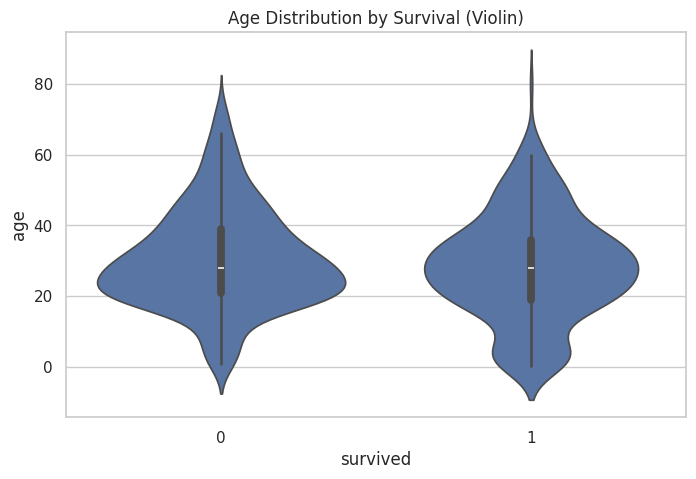

Saved: outputs/fare_box_by_class.png


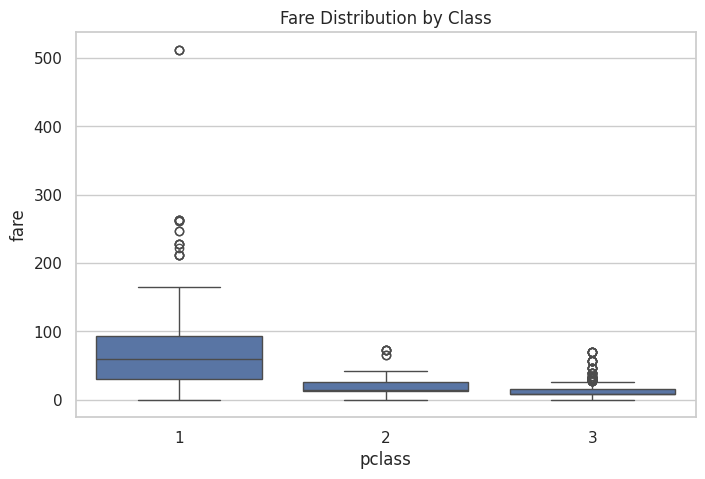

Saved: outputs/correlation_heatmap.png


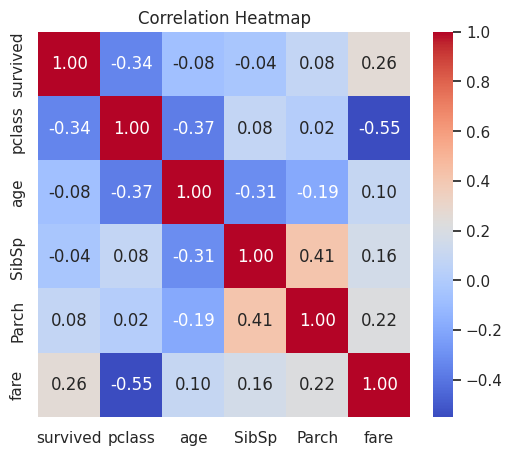


✅ EDA complete! Check the 'outputs/' folder for dataset and plots.


In [9]:
"""
Titanic Dataset EDA
-------------------
This script performs Exploratory Data Analysis (EDA) on the Titanic dataset.
It generates multiple plots, saves them as PNGs inside the 'outputs/' folder,
and also displays them when executed.

Outputs:
 - outputs/titanic_dataset.csv
 - outputs/*.png (all graphs)
"""

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Setup
# ----------------------------
sns.set(style="whitegrid")
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Titanic dataset (publicly available Kaggle mirror)
DATA_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# ----------------------------
# Load & Prepare Data
# ----------------------------
print("Loading dataset...")
df = pd.read_csv(DATA_URL)
df.columns = [c.strip() for c in df.columns]

# Rename important columns
df = df.rename(columns={
    "Survived": "survived",
    "Pclass": "pclass",
    "Sex": "sex",
    "Age": "age",
    "Fare": "fare",
    "Embarked": "embarked"
})

df["survived"] = df["survived"].astype(int)

# Save cleaned dataset
dataset_path = os.path.join(OUT_DIR, "titanic_dataset.csv")
df.to_csv(dataset_path, index=False)
print(f"Dataset saved to {dataset_path}")

# ----------------------------
# Helper function to save+show plots
# ----------------------------
def save_and_show(fig, filename):
    path = os.path.join(OUT_DIR, filename)
    fig.savefig(path, bbox_inches="tight")
    print("Saved:", path)
    plt.show()

# ----------------------------
# Visualizations
# ----------------------------

# 1. Passenger Count by Class
fig = plt.figure(figsize=(8,5))
sns.countplot(x="pclass", data=df, order=sorted(df["pclass"].unique()))
plt.title("Passenger Count by Class")
save_and_show(fig, "count_by_class.png")

# 2. Survival Rate by Class
surv_by_class = df.groupby("pclass")["survived"].mean().reset_index()
fig = plt.figure(figsize=(8,5))
sns.barplot(x="pclass", y="survived", data=surv_by_class, order=sorted(surv_by_class["pclass"]))
plt.ylim(0,1)
plt.title("Survival Rate by Class")
save_and_show(fig, "survival_rate_by_class.png")

# 3. Survival by Sex
fig = plt.figure(figsize=(8,5))
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival by Sex (0 = Died, 1 = Survived)")
save_and_show(fig, "survival_by_sex.png")

# 4. Age Distribution by Survival (KDE)
fig = plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="age", hue="survived", fill=True, common_norm=False)
plt.title("Age Distribution by Survival (KDE)")
save_and_show(fig, "age_kde_by_survival.png")

# 5. Age Distribution (Violin)
fig = plt.figure(figsize=(8,5))
sns.violinplot(x="survived", y="age", data=df)
plt.title("Age Distribution by Survival (Violin)")
save_and_show(fig, "age_violin_by_survival.png")

# 6. Fare Distribution by Class
fig = plt.figure(figsize=(8,5))
sns.boxplot(x="pclass", y="fare", data=df, order=sorted(df["pclass"].unique()))
plt.title("Fare Distribution by Class")
save_and_show(fig, "fare_box_by_class.png")

# 7. Correlation Heatmap
numeric_cols = ["survived", "pclass", "age", "SibSp", "Parch", "fare"]
numeric_cols = [c for c in numeric_cols if c in df.columns]
fig = plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
save_and_show(fig, "correlation_heatmap.png")

print("\n✅ EDA complete! Check the 'outputs/' folder for dataset and plots.")
